In [6]:
# Cell: Download Sample Images
import requests
from pathlib import Path
from PIL import Image
from io import BytesIO

def download_sample_images(n_images=20):
    """Download sample images from Lorem Picsum (free image service)"""
    
    image_dir = Path('../data/raw/images')
    image_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"Downloading {n_images} sample images...")
    
    # Different sizes and categories
    categories = ['nature', 'city', 'people', 'food', 'tech']
    
    for i in range(n_images):
        try:
            # Lorem Picsum provides random images
            url = f"https://picsum.photos/800/600?random={i}"
            response = requests.get(url)
            
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                
                # Save with category name
                category = categories[i % len(categories)]
                filename = f"{category}_{i:03d}.jpg"
                img.save(image_dir / filename)
                
                print(f"✓ Downloaded {filename}")
            
        except Exception as e:
            print(f"✗ Failed to download image {i}: {e}")
    
    print(f"\n✅ Download complete! Check data/raw/images/")

# Download 20 sample images
download_sample_images(20)

✓ Downloaded nature_000.jpg
✓ Downloaded city_001.jpg
✓ Downloaded people_002.jpg
✓ Downloaded food_003.jpg
✓ Downloaded tech_004.jpg
✓ Downloaded nature_005.jpg
✓ Downloaded city_006.jpg
✓ Downloaded people_007.jpg
✓ Downloaded food_008.jpg
✓ Downloaded tech_009.jpg
✓ Downloaded nature_010.jpg
✓ Downloaded city_011.jpg
✓ Downloaded people_012.jpg
✓ Downloaded food_013.jpg
✓ Downloaded tech_014.jpg
✓ Downloaded nature_015.jpg
✓ Downloaded city_016.jpg
✓ Downloaded people_017.jpg
✓ Downloaded food_018.jpg
✓ Downloaded tech_019.jpg

✅ Download complete! Check data/raw/images/


Found 25 images


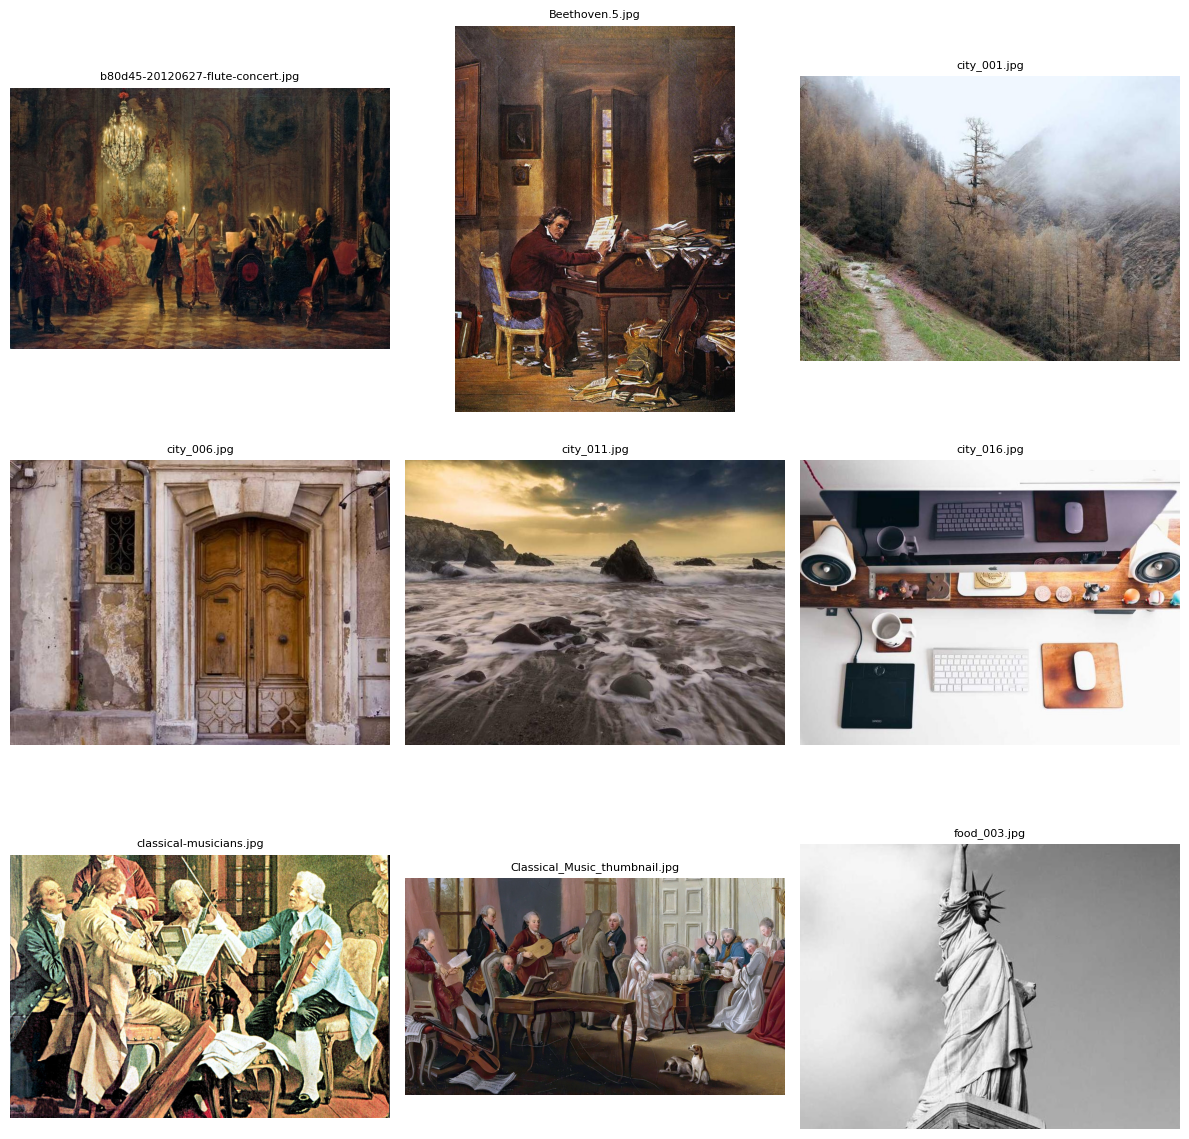

In [8]:
# Cell 2: Display sample images

def show_sample_images(image_paths, n_samples=9):
    """Display a grid of sample images"""
    n_samples = min(n_samples, len(image_paths))
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.ravel()
    
    for i in range(n_samples):
        img = Image.open(image_paths[i])
        axes[i].imshow(img)
        axes[i].set_title(image_paths[i].name, fontsize=8)
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(n_samples, 9):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Reload image list (in case new images were added)
image_dir = Path('../data/raw/images')
image_files = list(image_dir.glob('*.jpg')) + list(image_dir.glob('*.png'))

print(f"Found {len(image_files)} images")

# Show your images
if len(image_files) > 0:
    show_sample_images(image_files)
else:
    print("No images found! Add some images to data/raw/images/")

In [9]:
# Cell 3: Analyze image properties
def analyze_images(image_paths):
    """Analyze basic properties of images"""
    
    widths = []
    heights = []
    aspect_ratios = []
    file_sizes = []
    
    print("Analyzing images...")
    
    for img_path in image_paths:
        # Open image
        img = Image.open(img_path)
        width, height = img.size
        
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)
        file_sizes.append(img_path.stat().st_size / 1024)  # KB
    
    # Print statistics
    print("\n📊 Image Statistics")
    print("=" * 50)
    print(f"Total images: {len(image_paths)}")
    print(f"\nDimensions:")
    print(f"  Width - Min: {min(widths)}px, Max: {max(widths)}px, Avg: {np.mean(widths):.0f}px")
    print(f"  Height - Min: {min(heights)}px, Max: {max(heights)}px, Avg: {np.mean(heights):.0f}px")
    print(f"\nAspect Ratios:")
    print(f"  Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Avg: {np.mean(aspect_ratios):.2f}")
    print(f"\nFile Sizes:")
    print(f"  Min: {min(file_sizes):.1f}KB, Max: {max(file_sizes):.1f}KB, Avg: {np.mean(file_sizes):.1f}KB")
    print("=" * 50)
    
    return {
        'widths': widths,
        'heights': heights,
        'aspect_ratios': aspect_ratios,
        'file_sizes': file_sizes
    }

# Analyze your images
stats = analyze_images(image_files)

Analyzing images...

📊 Image Statistics
Total images: 25

Dimensions:
  Width - Min: 649px, Max: 2864px, Avg: 933px
  Height - Min: 450px, Max: 3376px, Avg: 749px

Aspect Ratios:
  Min: 0.72, Max: 1.75, Avg: 1.32

File Sizes:
  Min: 29.6KB, Max: 3389.5KB, Avg: 226.9KB


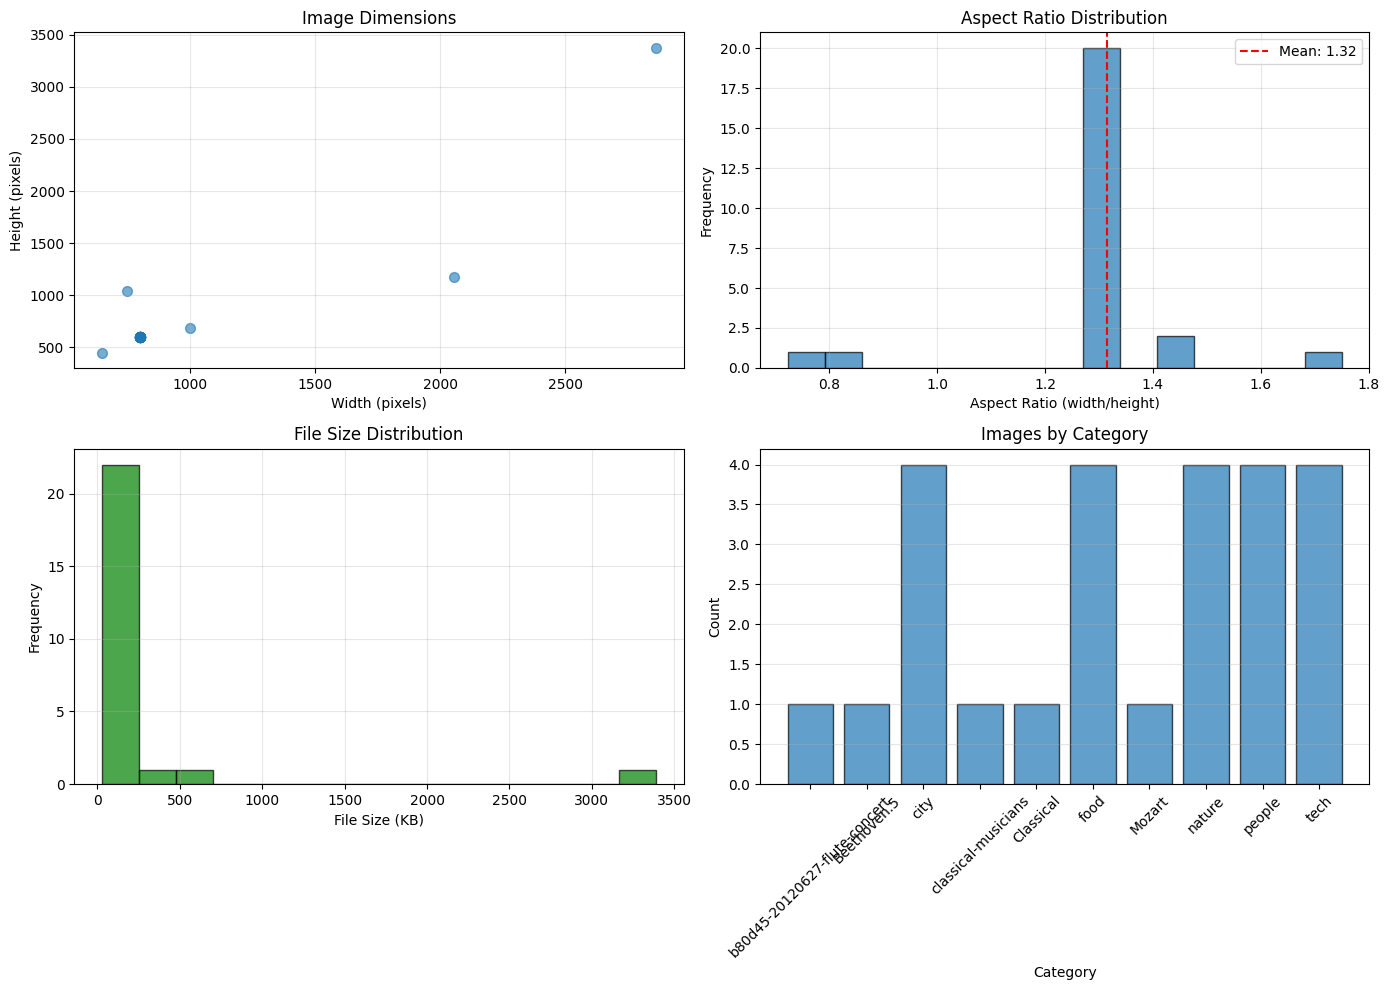

✅ Statistics plots saved to data/processed/dataset_statistics.png


In [10]:
# Cell 4: Visualize image statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Image dimensions scatter
axes[0, 0].scatter(stats['widths'], stats['heights'], alpha=0.6, s=50)
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Height (pixels)')
axes[0, 0].set_title('Image Dimensions')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Aspect ratio distribution
axes[0, 1].hist(stats['aspect_ratios'], bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Aspect Ratio (width/height)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Aspect Ratio Distribution')
axes[0, 1].axvline(np.mean(stats['aspect_ratios']), color='red', 
                    linestyle='--', label=f"Mean: {np.mean(stats['aspect_ratios']):.2f}")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: File size distribution
axes[1, 0].hist(stats['file_sizes'], bins=15, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('File Size (KB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('File Size Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Category distribution (if applicable)
if len(image_files) > 0:
    # Extract categories from filenames
    categories = [f.stem.split('_')[0] for f in image_files]
    from collections import Counter
    category_counts = Counter(categories)
    
    axes[1, 1].bar(category_counts.keys(), category_counts.values(), alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Category')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Images by Category')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/dataset_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Statistics plots saved to data/processed/dataset_statistics.png")

In [11]:
# Cell 5: Create metadata for each image
import json

def create_metadata(image_paths):
    """Create metadata for each image"""
    
    metadata = []
    
    for i, img_path in enumerate(image_paths):
        # Extract category from filename
        filename = img_path.stem
        category = filename.split('_')[0] if '_' in filename else 'unknown'
        
        # Get image info
        img = Image.open(img_path)
        width, height = img.size
        
        # Create metadata entry
        meta = {
            'id': filename,
            'embedding_index': i,
            'filename': img_path.name,
            'category': category,
            'description': f'{category} image {i}',
            'width': width,
            'height': height,
            'path': str(img_path)
        }
        
        metadata.append(meta)
    
    return metadata

# Create metadata
metadata = create_metadata(image_files)

# Display first few entries
print("📋 Sample Metadata:")
print("=" * 50)
for i, meta in enumerate(metadata[:3]):
    print(f"\nImage {i+1}:")
    for key, value in meta.items():
        if key != 'path':  # Skip full path for cleaner display
            print(f"  {key}: {value}")
print("\n" + "=" * 50)

# Save metadata
metadata_path = Path('../data/processed/metadata.json')
metadata_path.parent.mkdir(exist_ok=True, parents=True)

with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"\n✅ Metadata saved to {metadata_path}")
print(f"Total images with metadata: {len(metadata)}")

📋 Sample Metadata:

Image 1:
  id: b80d45-20120627-flute-concert
  embedding_index: 0
  filename: b80d45-20120627-flute-concert.jpg
  category: unknown
  description: unknown image 0
  width: 1000
  height: 687

Image 2:
  id: Beethoven.5
  embedding_index: 1
  filename: Beethoven.5.jpg
  category: unknown
  description: unknown image 1
  width: 750
  height: 1037

Image 3:
  id: city_001
  embedding_index: 2
  filename: city_001.jpg
  category: city
  description: city image 2
  width: 800
  height: 600


✅ Metadata saved to ..\data\processed\metadata.json
Total images with metadata: 25


In [12]:
# Cell 6: Summary
print("\n" + "=" * 60)
print("🎉 DATA EXPLORATION COMPLETE!")
print("=" * 60)

print("\n📋 Summary:")
print(f"  ✅ Total images processed: {len(metadata)}")
print(f"  ✅ Metadata created: {len(metadata)} entries")
print(f"  ✅ Categories found: {len(set(m['category'] for m in metadata))}")
print(f"  ✅ Average image size: {np.mean(stats['widths']):.0f} x {np.mean(stats['heights']):.0f} pixels")

print("\n📁 Files created:")
print(f"  • data/processed/metadata.json")
print(f"  • data/processed/dataset_statistics.png")

print("\n⏭️  Next Steps:")
print("  1. ✅ Data exploration complete")
print("  2. ⏭️  Open notebook 02_embedding_generation.ipynb")
print("  3. ⏭️  Generate image embeddings with CLIP")
print("  4. ⏭️  Build vector database")

print("\n" + "=" * 60)


🎉 DATA EXPLORATION COMPLETE!

📋 Summary:
  ✅ Total images processed: 25
  ✅ Metadata created: 25 entries
  ✅ Categories found: 8
  ✅ Average image size: 933 x 749 pixels

📁 Files created:
  • data/processed/metadata.json
  • data/processed/dataset_statistics.png

⏭️  Next Steps:
  1. ✅ Data exploration complete
  2. ⏭️  Open notebook 02_embedding_generation.ipynb
  3. ⏭️  Generate image embeddings with CLIP
  4. ⏭️  Build vector database

